In [1]:
import pandas as pd
#Configuración de parametros de Pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 3)
pd.set_option('plotting.backend', 'matplotlib') 
pd.options.mode.chained_assignment = None

# En produccion eliminar, se incluye por informacion
print(f'Pandas Version: {pd.__version__}') 

Pandas Version: 1.5.3


In [2]:
import numpy as np

np.set_printoptions(suppress=True)

# En produccion eliminar, se incluye por informacion
print(f'Numpy version: {np.__version__}')

Numpy version: 1.21.5


In [3]:
import matplotlib
print(f'Matplotlib version: {matplotlib.__version__}')

import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib version: 3.6.0


In [4]:
import warnings
warnings.filterwarnings("ignore",message=".*numpy.*")

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [6]:
import gc
iInitial = len(gc.get_objects())

In [7]:
#!pip install tensorflow

In [8]:
import tensorflow
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [9]:
print('\nLibrerías base__________________________________')
print('Numpy'.ljust(15) + ' :' + str(np.__version__))
print('Pandas'.ljust(15) + ' :' + str(pd.__version__)) 
print('Tensorflow'.ljust(15) + ' :' + str(tensorflow.__version__))
print('\nLibrerías jupyter_______________________________')
bfJuppyter = !jupyter --version
for bfPackages in bfJuppyter:
    if bfPackages.count('Selected Jupyter')==0:
        arPackages = bfPackages.split(':')
        print(arPackages[0].strip().capitalize().ljust(15) + ' :' + arPackages[1]) 
print('________________________________________________\n')        


Librerías base__________________________________
Numpy           :1.21.5
Pandas          :1.5.3
Tensorflow      :2.10.1

Librerías jupyter_______________________________
Ipython         : 7.31.1
Ipykernel       : 6.15.2
Ipywidgets      : 7.7.3
Jupyter_client  : 7.3.4
Jupyter_core    : 4.11.1
Jupyter_server  : 1.18.1
Jupyterlab      : 3.4.4
Nbclient        : 0.5.13
Nbconvert       : 6.4.4
Nbformat        : 5.5.0
Notebook        : 6.4.12
Qtconsole       : 5.2.2
Traitlets       : 5.1.1
________________________________________________



In [10]:
iTotal = len(gc.get_objects())
del tensorflow
gc.collect()
iFinal = len(gc.get_objects())

In [11]:
print('Garbage Collector Objects:')
print(f'Start: {iInitial}')
print(f'Total: {iTotal}')
print(f'End  : {iFinal}')

Garbage Collector Objects:
Start: 185589
Total: 349520
End  : 348601


In [12]:
train_set = pd.read_csv('./2_fe_data/train_set_fe.csv')

In [14]:
test_set = pd.read_csv('./2_fe_data/test_set_fe.csv')

In [15]:
train_set.head()

,is_fraud,transaction_amt,product_cd,card1,card2,card3,card4,card5,card6,addr1,addr2,p_emaildomain,r_emaildomain,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,d1,d2,d3,d4,d5,d6,d8,d9,d10,d12,d13,d14,d15,m4,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_34,id_35,id_36,id_37,id_38,device_type,device_info,Hora,diaSemana,pixelCount,V_0,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,V_11,V_12,V_13,V_14,V_15,V_16,V_17,V_18,V_19
0,0,68.5,0.020,13926,-1.0,150.0,0.077,142.0,0.067,315.0,87.0,-1.000,-1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,-1.0,13.0,-1.0,-1.0,-1.0,-1.0,-1.0,13.0,-1.0,-1.0,-1.0,0.0,0.114,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.0,-1.000,-1.000,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.00,-1.000,-1.0,0,1,-1.000e+00,-6602.023,-772.102,30.573,-14.024,-129.583,-25.620,-48.798,-74.692,56.160,120.992,45.940,1.509,-88.539,9.456,74.749,-17.590,82.193,0.204,-11.245,6.793
1,0,29.0,0.020,2755,404.0,150.0,0.034,102.0,0.067,325.0,87.0,0.044,-1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,0.0,0.037,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.0,-1.000,-1.000,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.00,-1.000,-1.0,0,1,-1.000e+00,-6601.840,-900.309,-45.776,-113.185,-126.300,-13.893,-109.024,-72.415,137.387,76.664,35.079,44.747,-47.047,-22.684,37.561,6.909,51.998,13.798,-12.369,13.181
2,0,59.0,0.020,4663,490.0,150.0,0.035,166.0,0.024,330.0,87.0,0.095,-1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,315.0,0.037,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.0,-1.000,-1.000,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.00,-1.000,-1.0,0,1,-1.000e+00,-6601.840,-900.309,-45.776,-113.185,-126.300,-13.893,-109.024,-72.415,137.386,76.663,35.079,44.746,-47.046,-22.684,37.561,6.910,51.997,13.797,-12.369,13.181
3,0,50.0,0.020,18132,567.0,150.0,0.034,117.0,0.024,476.0,87.0,0.023,-1.0,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,-1.0,-1.0,-1.0,84.0,-1.0,-1.0,-1.0,111.0,0.037,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.0,-1.000,-1.000,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.00,-1.000,-1.0,0,1,-1.000e+00,-6605.333,1551.597,1341.548,1461.907,177.574,-141.031,284.937,79.265,-1043.247,-360.917,-47.767,-107.047,-368.710,569.129,599.248,-123.424,-49.072,97.753,-200.858,-97.458
4,0,50.0,0.048,4497,514.0,150.0,0.034,102.0,0.067,420.0,87.0,0.044,-1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,0.0,70787.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,100.0,0.082,-1.0,-480.0,0.049,0.048,166.0,542.0,144.0,0.052,0.051,0.058,0.071,32.0,0.039,0.045,0.082,0.083,0.06,0.102,0.0,0,1,2.398e+06,163765.389,-665.245,9.441,-161.765,305.487,6808.540,993.627,340.522,54.097,192.289,-4.999,-15.487,-227.064,-11.594,277.127,136.411,-96.232,23.447,269.092,-358.686


In [16]:
test_set.head()

,transaction_amt,product_cd,card1,card2,card3,card4,card5,card6,addr1,addr2,p_emaildomain,r_emaildomain,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,d1,d2,d3,d4,d5,d6,d8,d9,d10,d12,d13,d14,d15,m4,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_34,id_35,id_36,id_37,id_38,device_type,device_info,Hora,diaSemana,pixelCount,V_0,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,V_11,V_12,V_13,V_14,V_15,V_16,V_17,V_18,V_19
0,31.95,0.02,10409,111.0,150.0,0.035,226.0,0.024,170.0,87.0,0.044,-1.0,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,-1.0,-1.0,-1.0,418.0,-1.0,-1.0,-1.0,409.0,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,3,-1.0,-14773.836,-400.386,-15.201,74.990,-178.987,-166.919,-23.790,-54.245,9.251,29.643,-80.520,15.939,-15.281,-27.509,-1.325,-12.851,33.182,58.192,16.029,-24.300
1,49.00,0.02,4272,111.0,150.0,0.035,226.0,0.024,299.0,87.0,0.022,-1.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,-1.0,-1.0,-1.0,231.0,-1.0,-1.0,-1.0,634.0,0.037,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,3,-1.0,-14773.862,-307.900,-14.370,115.217,-11.648,27.048,47.100,-1.998,-60.303,7.081,66.285,8.059,100.573,53.951,-12.655,74.409,-109.253,-130.812,5.223,74.615
2,171.00,0.02,4476,574.0,150.0,0.035,226.0,0.024,472.0,87.0,0.053,-1.0,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,-1.0,-1.0,-1.0,136.0,-1.0,-1.0,-1.0,97.0,0.037,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,3,-1.0,-14773.964,-51.627,54.285,223.258,624.818,555.087,259.690,188.959,-257.370,240.304,448.106,46.932,254.094,381.819,-13.355,270.050,-518.982,-552.697,132.909,293.340
3,284.95,0.02,10989,360.0,150.0,0.035,166.0,0.024,205.0,87.0,0.044,-1.0,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,-1.0,-1.0,-1.0,242.0,-1.0,-1.0,-1.0,242.0,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,3,-1.0,-14773.846,-414.861,-15.322,68.409,-208.623,-195.681,-40.927,-61.675,19.561,24.142,-99.578,21.342,-30.974,-40.183,1.287,-21.922,49.805,70.112,2.724,-17.588
4,67.95,0.02,18018,452.0,150.0,0.034,117.0,0.024,264.0,87.0,0.044,-1.0,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,-1.0,-1.0,-1.0,22.0,-1.0,-1.0,-1.0,22.0,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,3,-1.0,-14773.843,-321.961,-22.745,106.031,-74.757,-4.155,-3.723,-1.367,-34.781,-36.624,9.753,-6.047,89.780,8.559,-6.899,47.981,-42.316,-14.998,10.098,31.752


In [17]:
X = train_set.drop('is_fraud', axis=1)
y = train_set['is_fraud']

In [18]:
print(X.shape, y.shape)

(590540, 92) (590540,)


In [19]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(395661, 92) (194879, 92) (395661,) (194879,)


In [22]:
from autokeras import StructuredDataClassifier

In [23]:
search = StructuredDataClassifier(overwrite = True, 
                                  max_trials = 1, 
                                  project_name = "nn_ai_tp",
                                  objective = "val_accuracy",                
                                  directory='nn_model')

In [24]:
search.fit(x = X_train, 
           y = y_train, 
           epochs = 1,
           verbose = 1)

Trial 1 Complete [00h 12m 43s]
val_accuracy: 0.9686540365219116

Best val_accuracy So Far: 0.9686540365219116
Total elapsed time: 00h 12m 43s
INFO:tensorflow:Oracle triggered exit
12365/12365 [==============================] - 218s 18ms/step - loss: 0.1150 - accuracy: 0.9689
INFO:tensorflow:Assets written to: nn_model\nn_ai_tp\best_model\assets


In [25]:
loss, acc = search.evaluate(X_test, y_test, verbose=1)

6090/6090 [==============================] - 93s 15ms/step - loss: 0.1078 - accuracy: 0.9709


In [26]:
print('Accuracy: %.3f' % acc)

Accuracy: 0.971


In [27]:
model = search.export_model()

In [28]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 92)]              0         
                                                                 
 multi_category_encoding (Mu  (None, 92)               0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 92)               185       
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                2976      
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056  

In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [32]:
preds = model.predict(X_test)

6090/6090 [==============================] - 85s 14ms/step


In [76]:
from sklearn.preprocessing import binarize
threshold = 0.5
binarized_preds = binarize(preds,threshold=0.5)

In [89]:
cm = confusion_matrix(y_test,binarized_preds)

In [78]:
ncm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]

(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

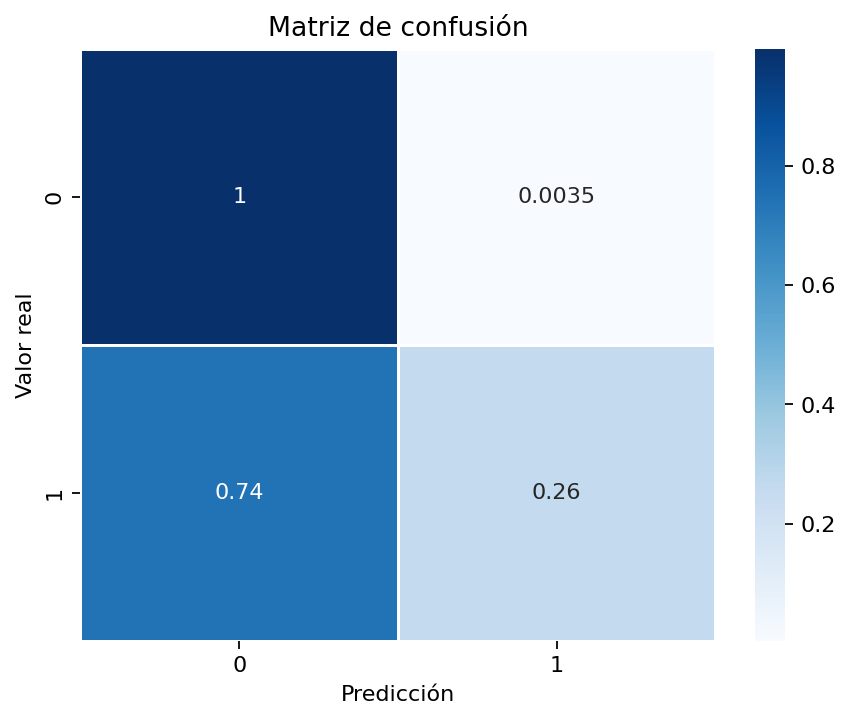

In [79]:
plt.figure(dpi = 160)
ax = sns.heatmap(ncm,linewidths=.5,annot = True,cmap = 'Blues')

ax.set_xlabel('Predicción')
ax.set_ylabel('Valor real')
ax.set_title('Matriz de confusión')

plt.xticks(rotation=0)

In [80]:
test_labels = pd.read_csv('0_data/test_transaction.csv')
test_labels = test_labels['TransactionID']
test_labels.shape

(506691,)

In [84]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, preds)

In [98]:
prob_preds = np.column_stack((fpr, tpr))

In [99]:
prob_preds

array([[0.        , 0.        ],
       [0.        , 0.00014819],
       [0.        , 0.00074096],
       ...,
       [0.998315  , 1.        ],
       [0.99995748, 1.        ],
       [1.        , 1.        ]])

In [100]:
resultados = pd.DataFrame()
resultados['TransactionID'] = test_labels
resultados['isFraud'] = pd.Series(prob_preds[:,1])

In [101]:
resultados.to_csv('predicciones_nn.csv', index=False) 